<a href="https://colab.research.google.com/github/krishnaaxo/project1/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
!ls '/content/drive'


MyDrive  Shareddrives


In [67]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [68]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#import matplotlib.pyplot as plt

In [69]:
IMAGE_SIZE = [224, 224]

In [70]:
train_path = '/content/drive/MyDrive/kaggle2pneumonia/chest_xray/train'
valid_path = '/content/drive/MyDrive/kaggle2pneumonia/chest_xray/test'

In [71]:
vgg = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [72]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>

In [73]:
for layer in vgg.layers:
  layer.trainable = False

In [74]:
folders = glob('/content/drive/MyDrive/kaggle2pneumonia/chest_xray/train/*')
print(len(folders))

2


In [75]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, 111, 111, 32) 96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_404 (Activation)     (None, 111, 111, 32) 0           batch_normalization_406[0][0]    
____________________________________________________________________________________________

In [76]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [77]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [78]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [79]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [80]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [81]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel2.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
5/5 - 212s - loss: 2.3218 - accuracy: 0.6875 - val_loss: 2.3802 - val_accuracy: 0.6619

Epoch 00001: val_loss improved from inf to 2.38019, saving model to mymodel2.h5
Epoch 2/5
5/5 - 45s - loss: 1.6932 - accuracy: 0.7000
Epoch 3/5
5/5 - 43s - loss: 0.8391 - accuracy: 0.8188
Epoch 4/5
5/5 - 44s - loss: 0.5737 - accuracy: 0.9187
Epoch 5/5
5/5 - 42s - loss: 0.4766 - accuracy: 0.9125
Training completed in time:  0:06:32.863765


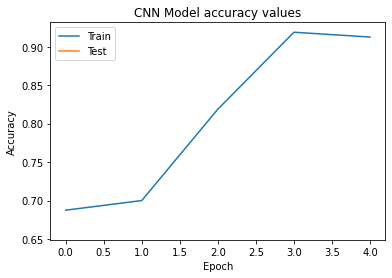

In [82]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


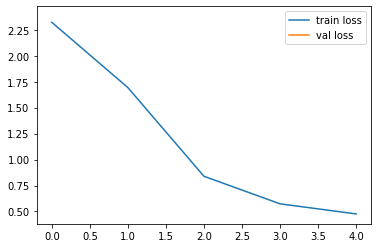

<Figure size 432x288 with 0 Axes>

In [83]:
# loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [84]:
import tensorflow as tf

In [85]:
from keras.models import load_model

In [86]:
model.save('model2_inceptionV2.h5')

In [87]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [88]:
model=load_model('model1_inceptionV3.h5')

In [89]:
img=image.load_img('/content/drive/MyDrive/kaggle2pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))

In [90]:
x=image.img_to_array(img)

In [91]:
x=x/255

In [92]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [93]:
c=model.predict(img_data)

In [94]:
a=np.argmax(model.predict(img_data), axis=1)

In [95]:
a==1

array([ True])

In [96]:
str(np.round(c[0][1],2))

'0.98'